# Model 2- Ridge Regression

In [ ]:
def run_RIDGE(my_data, features, indyvar):
    print("yvar is " + str(indyvar))
    data_merge_RIDGE = my_data.dropna()

    sel_recon_RIDGE = features
    x = data_merge_RIDGE.loc[:, sel_recon_RIDGE]
    y = np.ravel(data_merge_RIDGE.loc[:, indyvar])

    list_numerical = x.columns
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

    scaler = StandardScaler().fit(X_train[list_numerical])

    X_train[list_numerical] = scaler.transform(X_train[list_numerical])
    X_test[list_numerical] = scaler.transform(X_test[list_numerical])

    reg = Ridge(alpha=1)
    reg.fit(X_train, y_train)

    # Training data
    pred_train = reg.predict(X_train)
    mse_train = mean_squared_error(y_train, pred_train)
    print('MSE training set', round(mse_train, 2))

    # Test data
    pred = reg.predict(X_test)
    mse_test = mean_squared_error(y_test, pred)
    print('MSE test set', round(mse_test, 2))

    ridge = Ridge()  # Initialize Ridge without specifying alpha
    coefs = []

    alphas = np.linspace(0.01, 500, 100)
    mse_values = []  # To store the MSE for each alpha during cross-validation

    for a in alphas:
        ridge.set_params(alpha=a)
        mse_fold = -cross_val_score(ridge, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
        mse_values.append(mse_fold.mean())
        ridge.fit(X_train, y_train)
        coefs.append(ridge.coef_)

    # Find the alpha with the lowest MSE
    best_alpha = alphas[np.argmin(mse_values)]

    ridge_best = Ridge(alpha=best_alpha)
    ridge_best.fit(X_train, y_train)
    print(list(zip(ridge_best.coef_, x)))

    print('R squared training set', round(ridge_best.score(X_train, y_train), 2))
    print('R squared test set', round(ridge_best.score(X_test, y_test), 2))

    mean_squared_error(y_test, ridge_best.predict(X_test))

    plt.subplot(1, 2, 1)

    ax = plt.gca()
    ax.plot(alphas, coefs)
    ax.set_xscale('log')
    plt.axis('tight')
    plt.xlabel('alpha')
    plt.ylabel('Standardized Coefficients')
    plt.title('Ridge coeff as a fct of alpha')
    plt.legend(list_numerical, fontsize=6)

    plt.subplot(1, 2, 2)

    plt.semilogx(alphas, mse_values, ":")
    plt.plot(
        best_alpha,
        np.min(mse_values),
        "ro",
        label="Best alpha",
        linewidth=2,
    )

    plt.legend()
    plt.xlabel("alphas")
    plt.ylabel("Mean square error")
    plt.title("MSE on each fold")
    plt.axis("tight")

    plt.show()



In [ ]:
def run_RIDGE_and_predict(my_data,features,indyvar):
    print("yvar is "+ str(indyvar))
    data_merge_RIDGE = my_data.dropna()

    sel_recon_RIDGE = features
    x = data_merge_RIDGE.loc[:,sel_recon_RIDGE]
    y = np.ravel(data_merge_RIDGE.loc[:,indyvar])

    list_numerical = x.columns
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

    scaler = StandardScaler().fit(X_train[list_numerical])

    X_train[list_numerical] = scaler.transform(X_train[list_numerical])
    X_test[list_numerical] = scaler.transform(X_test[list_numerical])

    reg = Ridge(alpha=1)
    reg.fit(X_train, y_train)

    # Training data
    pred_train = reg.predict(X_train)
    mse_train = mean_squared_error(y_train, pred_train)
    print('MSE training set', round(mse_train, 2))

    # Test data
    pred = reg.predict(X_test)
    mse_test =mean_squared_error(y_test, pred)
    print('MSE test set', round(mse_test, 2))

    alphas = np.linspace(0.01,500,100)
    ridge = Ridge()
    coefs = []

    for a in alphas:
        ridge.set_params(alpha=a)
        ridge.fit(X_train, y_train)
        coefs.append(ridge.coef_)



    # Ridge with 5 fold cross-validation
    model1 = RidgeCV(cv=10)

    # Fit model
    model1.fit(X_train, y_train)

    print(model1.alpha_)
    ridge_best = Ridge(alpha=model1.alpha_)
    ridge_best.fit(X_train, y_train)
    print(list(zip(ridge_best.coef_, x)))

    print('R squared training set', round(ridge_best.score(X_train, y_train), 2))
    print('R squared test set', round(ridge_best.score(X_test, y_test), 2))

    mean_squared_error(y_test, ridge_best.predict(X_test))

    data_merge_RIDGE = my_data.dropna()
    x = data_merge_RIDGE.loc[:,sel_recon_RIDGE]
    y = np.ravel(data_merge_RIDGE.loc[:,indyvar])
    y_pred = model1.predict(x)

    return(y_pred)

## Predict grading features from shapemetrics data - RIDGE

In [ ]:
grading_ind = ['roundness', 'tailedness', 'blockiness', 'curviness']
shapemetrics_ind = ['firstorder_count', 'tail_count','residerror_count', 'roothairs_count', 'sphereerrors_count', 'largeresiderror_count', 'area_px','length_px', 'width_px', 'weight_oz', 'length_in','width_in']
usno1 = ['deviation_from_usno1']

In [ ]:
# SELECT USER ROLE IF YOU WANT TO SPLIT IT
data_z = data_z.loc[data_z['user_role'] == "Breeder"]

yvar is ['deviation_from_usno1']
MSE training set 295.24
MSE test set 357.26
[(4.604154038864356, 'roundness'), (9.257547134450105, 'tailedness'), (-2.089967484684143, 'blockiness'), (12.979149062780245, 'curviness')]
R squared training set 0.54
R squared test set 0.5


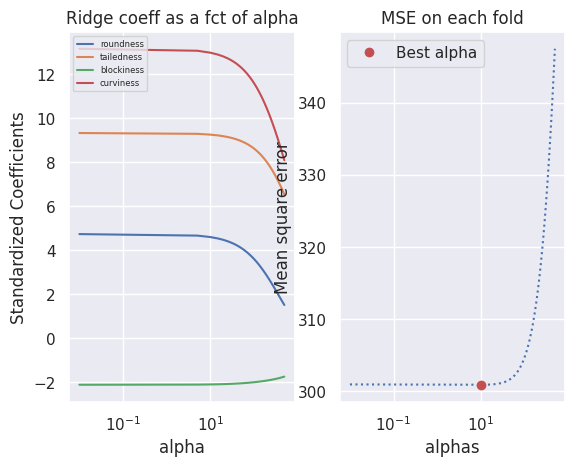

yvar is ['deviation_from_usno1']
MSE training set 429.93
MSE test set 505.76
[(-9.874987544003767, 'firstorder_count'), (110.27054704766181, 'tail_count'), (12.298807197238567, 'residerror_count'), (-171.1564092108337, 'roothairs_count'), (73.73148589862751, 'sphereerrors_count'), (-22.15533461193512, 'largeresiderror_count'), (-188.2236795598926, 'area_px'), (28.371377974938703, 'length_px'), (27.53256258480074, 'width_px'), (104.7792525324353, 'weight_oz'), (28.371377975666952, 'length_in'), (27.53256258605317, 'width_in')]
R squared training set 0.37
R squared test set 0.33


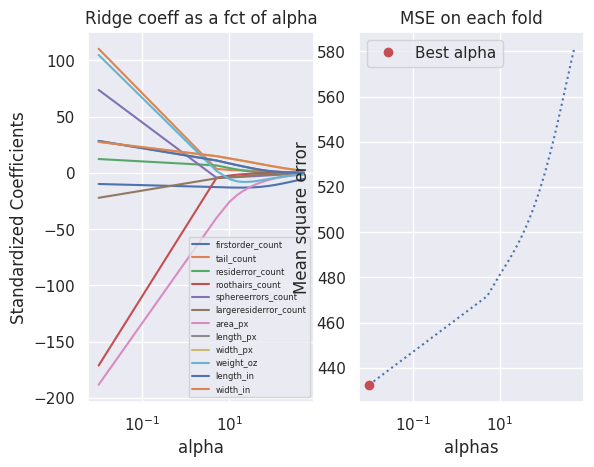

yvar is ['roundness']
MSE training set 341.05
MSE test set 388.94
[(-0.8388127789665301, 'firstorder_count'), (0.07092890383111221, 'tail_count'), (0.6706357594530409, 'residerror_count'), (2.8312031718683164, 'roothairs_count'), (0.3747861262460081, 'sphereerrors_count'), (-3.3488127534302348, 'largeresiderror_count'), (-10.165004804514847, 'area_px'), (-7.972216865144053, 'length_px'), (9.704679773203395, 'width_px'), (3.309364639387992, 'weight_oz'), (-7.972216865144836, 'length_in'), (9.704679773203413, 'width_in')]
R squared training set 0.62
R squared test set 0.55


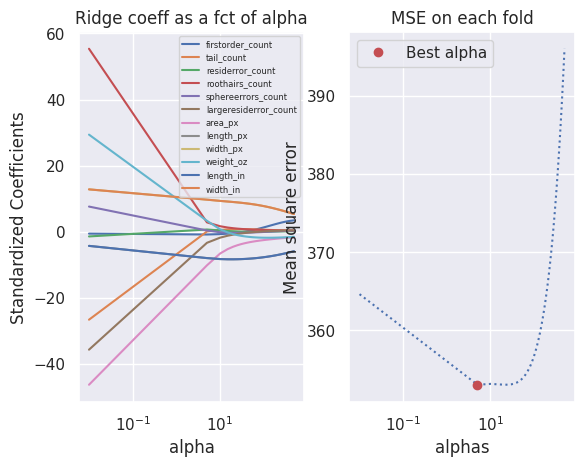

yvar is ['tailedness']
MSE training set 728.72
MSE test set 747.71
[(-19.872987102966153, 'firstorder_count'), (38.94864572103656, 'tail_count'), (11.320176990884844, 'residerror_count'), (-50.84039407700454, 'roothairs_count'), (37.12739834727202, 'sphereerrors_count'), (-38.66625001711161, 'largeresiderror_count'), (-101.54997117641712, 'area_px'), (16.88390567746341, 'length_px'), (18.327066687498256, 'width_px'), (49.42624490603675, 'weight_oz'), (16.883905678065265, 'length_in'), (18.327066688201125, 'width_in')]
R squared training set 0.33
R squared test set 0.24


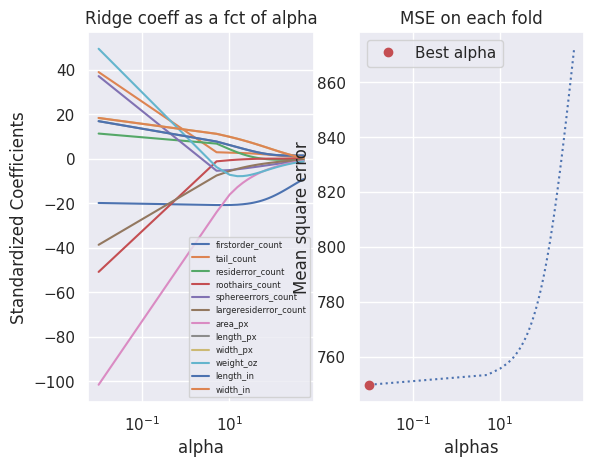

yvar is ['blockiness']
MSE training set 519.43
MSE test set 518.89
[(10.637275715277562, 'firstorder_count'), (-65.19288365205188, 'tail_count'), (-1.8057521824623965, 'residerror_count'), (91.46137668526944, 'roothairs_count'), (-66.19846354295078, 'sphereerrors_count'), (39.56357337884784, 'largeresiderror_count'), (50.65702981638011, 'area_px'), (-4.655024209367929, 'length_px'), (-3.514409951045271, 'width_px'), (-36.28858286983844, 'weight_oz'), (-4.655024209342613, 'length_in'), (-3.5144099514791143, 'width_in')]
R squared training set 0.2
R squared test set 0.13


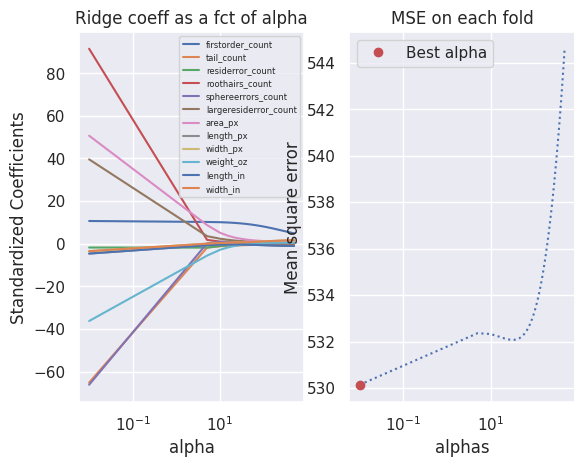

yvar is ['curviness']
MSE training set 439.23
MSE test set 567.62
[(-7.685951622060205, 'firstorder_count'), (1.0777657156979952, 'tail_count'), (2.553865880856598, 'residerror_count'), (-2.646650032172835, 'roothairs_count'), (-3.4618699991640773, 'sphereerrors_count'), (0.23454946709969987, 'largeresiderror_count'), (-11.167851719048572, 'area_px'), (4.161968200569639, 'length_px'), (4.274896888230856, 'width_px'), (0.5627048400381167, 'weight_oz'), (4.161968200569649, 'length_in'), (4.2748968882308365, 'width_in')]
R squared training set 0.13
R squared test set 0.12


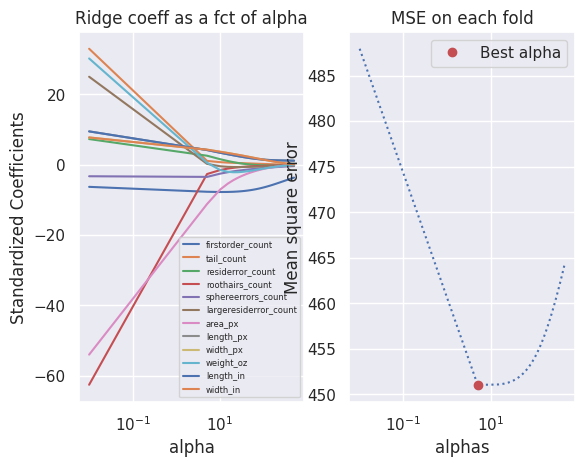

In [ ]:
# devUS#1 from grading
run_RIDGE(my_data = data_z, features=grading_ind, indyvar= ['deviation_from_usno1'])

# devUS#1 from reconstruction
run_RIDGE(my_data = data_z, features=shapemetrics_ind, indyvar= ['deviation_from_usno1'])

# roundness from reconstruction
run_RIDGE(my_data = data_z, features=shapemetrics_ind, indyvar= ['roundness'])

# tailedness from reconstruction
run_RIDGE(my_data = data_z, features=shapemetrics_ind, indyvar= ['tailedness'])

# blockiness from reconstruction
run_RIDGE(my_data = data_z, features=shapemetrics_ind, indyvar= ['blockiness'])

# curviness from reconstruction
run_RIDGE(my_data = data_z, features=shapemetrics_ind, indyvar= ['curviness'])

## Predict from prediction (see description)
We use RIDGE to predict each grading feature (roundness, curviness, tailedness, blockiness) from the shapemetrics data. Then, we use those predictions to predict deviation from USNo1

In [ ]:
data_merge_z3 = data_z
data_pred2 = data_merge_z3.dropna()

data_pred2['roundness'] = run_RIDGE_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['roundness'])
data_pred2['curviness'] = run_RIDGE_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['curviness'])
data_pred2['tailedness'] = run_RIDGE_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['tailedness'])
data_pred2['blockiness'] = run_RIDGE_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['blockiness'])


yvar is ['roundness']
MSE training set 341.05
MSE test set 388.94
1.0
[(-0.7409319020922143, 'firstorder_count'), (-3.1507712110807597, 'tail_count'), (0.6426516970071512, 'residerror_count'), (10.419406842759672, 'roothairs_count'), (4.296445381382783, 'sphereerrors_count'), (-11.764078515059914, 'largeresiderror_count'), (-25.705518614089463, 'area_px'), (-6.395100875276447, 'length_px'), (11.036531700939015, 'width_px'), (14.528584895673509, 'weight_oz'), (-6.395100875279367, 'length_in'), (11.036531700937525, 'width_in')]
R squared training set 0.62
R squared test set 0.55
yvar is ['curviness']
MSE training set 439.23
MSE test set 567.62


<ipython-input-24-95d47ef69c72>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred2['roundness'] = run_RIDGE_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['roundness'])


10.0
[(-7.756972034606739, 'firstorder_count'), (0.7252423629285534, 'tail_count'), (1.579616803963197, 'residerror_count'), (-1.5296009391017078, 'roothairs_count'), (-2.550685823329492, 'sphereerrors_count'), (-0.4388558738460501, 'largeresiderror_count'), (-7.105480241442375, 'area_px'), (3.4045623363641706, 'length_px'), (3.6906963775003367, 'width_px'), (-1.4886090984483697, 'weight_oz'), (3.4045623363642603, 'length_in'), (3.6906963775003683, 'width_in')]
R squared training set 0.12
R squared test set 0.12
yvar is ['tailedness']
MSE training set 728.72
MSE test set 747.71


<ipython-input-24-95d47ef69c72>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred2['curviness'] = run_RIDGE_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['curviness'])


1.0
[(-20.226888475028183, 'firstorder_count'), (4.9497707033080065, 'tail_count'), (10.94581439678842, 'residerror_count'), (-3.8728330609201236, 'roothairs_count'), (-1.8669530850683105, 'sphereerrors_count'), (-14.455437584116913, 'largeresiderror_count'), (-55.815668435371265, 'area_px'), (11.952774375466023, 'length_px'), (14.426027216018651, 'width_px'), (16.963347855543827, 'weight_oz'), (11.952774375466332, 'length_in'), (14.426027216014175, 'width_in')]
R squared training set 0.32
R squared test set 0.25
yvar is ['blockiness']
MSE training set 519.43
MSE test set 518.89


<ipython-input-24-95d47ef69c72>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred2['tailedness'] = run_RIDGE_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['tailedness'])


0.1
[(10.247554070458891, 'firstorder_count'), (-36.131323600010795, 'tail_count'), (-2.3341754186074657, 'residerror_count'), (49.23086497848896, 'roothairs_count'), (-38.671551209761965, 'sphereerrors_count'), (27.5411936519282, 'largeresiderror_count'), (45.45798798284246, 'area_px'), (-4.309299249237241, 'length_px'), (-3.0238932295104974, 'width_px'), (-32.42527967605872, 'weight_oz'), (-4.309299249268358, 'length_in'), (-3.0238932295295395, 'width_in')]
R squared training set 0.2
R squared test set 0.13


<ipython-input-24-95d47ef69c72>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred2['blockiness'] = run_RIDGE_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['blockiness'])


yvar is ['deviation_from_usno1']
MSE training set 593.82
MSE test set 674.58
[(282.98767916539146, 'roundness'), (-173.02784370977116, 'tailedness'), (296.98072552161045, 'blockiness'), (188.42182251160537, 'curviness')]
R squared training set 0.09
R squared test set 0.06


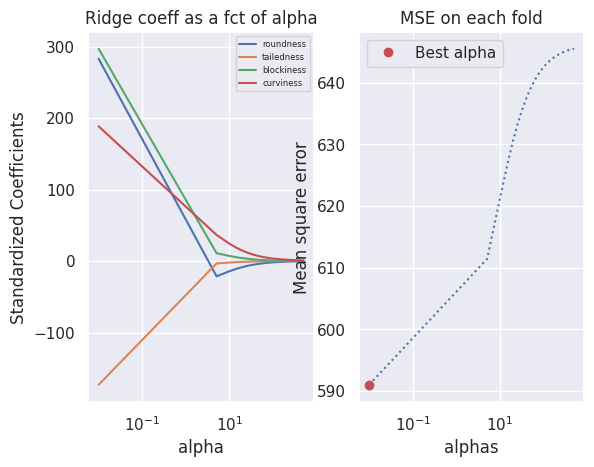

In [ ]:
run_RIDGE(my_data = data_pred2, features=grading_ind, indyvar= ['deviation_from_usno1'])
